<a href="https://colab.research.google.com/github/saheedniyi02/sport_plots_template/blob/main/Highest_FPL_points_2022_23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install highlight_text

In [2]:
from highlight_text import fig_text,ax_text

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import urllib
import os
from PIL import Image
import matplotlib.ticker as ticker
import matplotlib.patheffects as path_effects
import matplotlib.font_manager as fm
from highlight_text import fig_text, ax_text
#from adjustText import adjust_text
from matplotlib.colors import LinearSegmentedColormap, Normalize
from matplotlib import cm
import matplotlib.pyplot as plt


In [4]:
font_path = "/content/drive/MyDrive/assets/fonts"
for x in os.listdir(font_path):
    for y in os.listdir(f"{font_path}/{x}"):
        if y.split(".")[-1] == "ttf":
            fm.fontManager.addfont(f"{font_path}/{x}/{y}")
            try:
                fm.FontProperties(weight=y.split("-")[-1].split(".")[0].lower(), fname=y.split("-")[0])
            except Exception:
                continue

#plt.style.use("../assets/stylesheets/soc_base.mplstyle")
plt.rcParams['font.family'] = 'Karla'

In [5]:
player_prev_stats = pd.read_csv(
        f"https://raw.githubusercontent.com/vaastav/Fantasy-Premier-League/master/data/2022-23/cleaned_players.csv",)
player_prev_stats["name"] = (
        player_prev_stats["first_name"] + " " + player_prev_stats["second_name"]
    )
#player_prev_stats.drop(["first_name", "second_name"], axis=1, inplace=True)

In [6]:
data=player_prev_stats[["second_name","element_type","total_points"]].sort_values(by="total_points", ascending=True).tail(15)

In [7]:

data

,second_name,element_type,total_points
508,De Gea Quintana,GK,161
443,Ramses Becker,GK,162
123,Raya Martin,GK,166
46,Watkins,FWD,175
514,Borges Fernandes,MID,176
122,Toney,FWD,182
474,De Bruyne,MID,183
552,Trippier,DEF,198
15,Martinelli Silva,MID,198
10,Saka,MID,202


In [9]:
layout = [["heading"]*6+["line"]+["subheading"]*6,
          ["heading"]*6+["line"]+["subheading"]*6,
          ["bar" ]*13,
          ["bar" ]*13,
          ["bar" ]*13,
          ["bar" ]*13,
          ["bar" ]*13,
          ["bar" ]*13,
          ["bar" ]*13,
          ["bar" ]*13,
          ["bar" ]*13,
          ["bar" ]*13,
          ["bar" ]*13,
          ["bar" ]*13,
          ["bar" ]*13,
          ["bar" ]*13,
          ["bar" ]*13,]

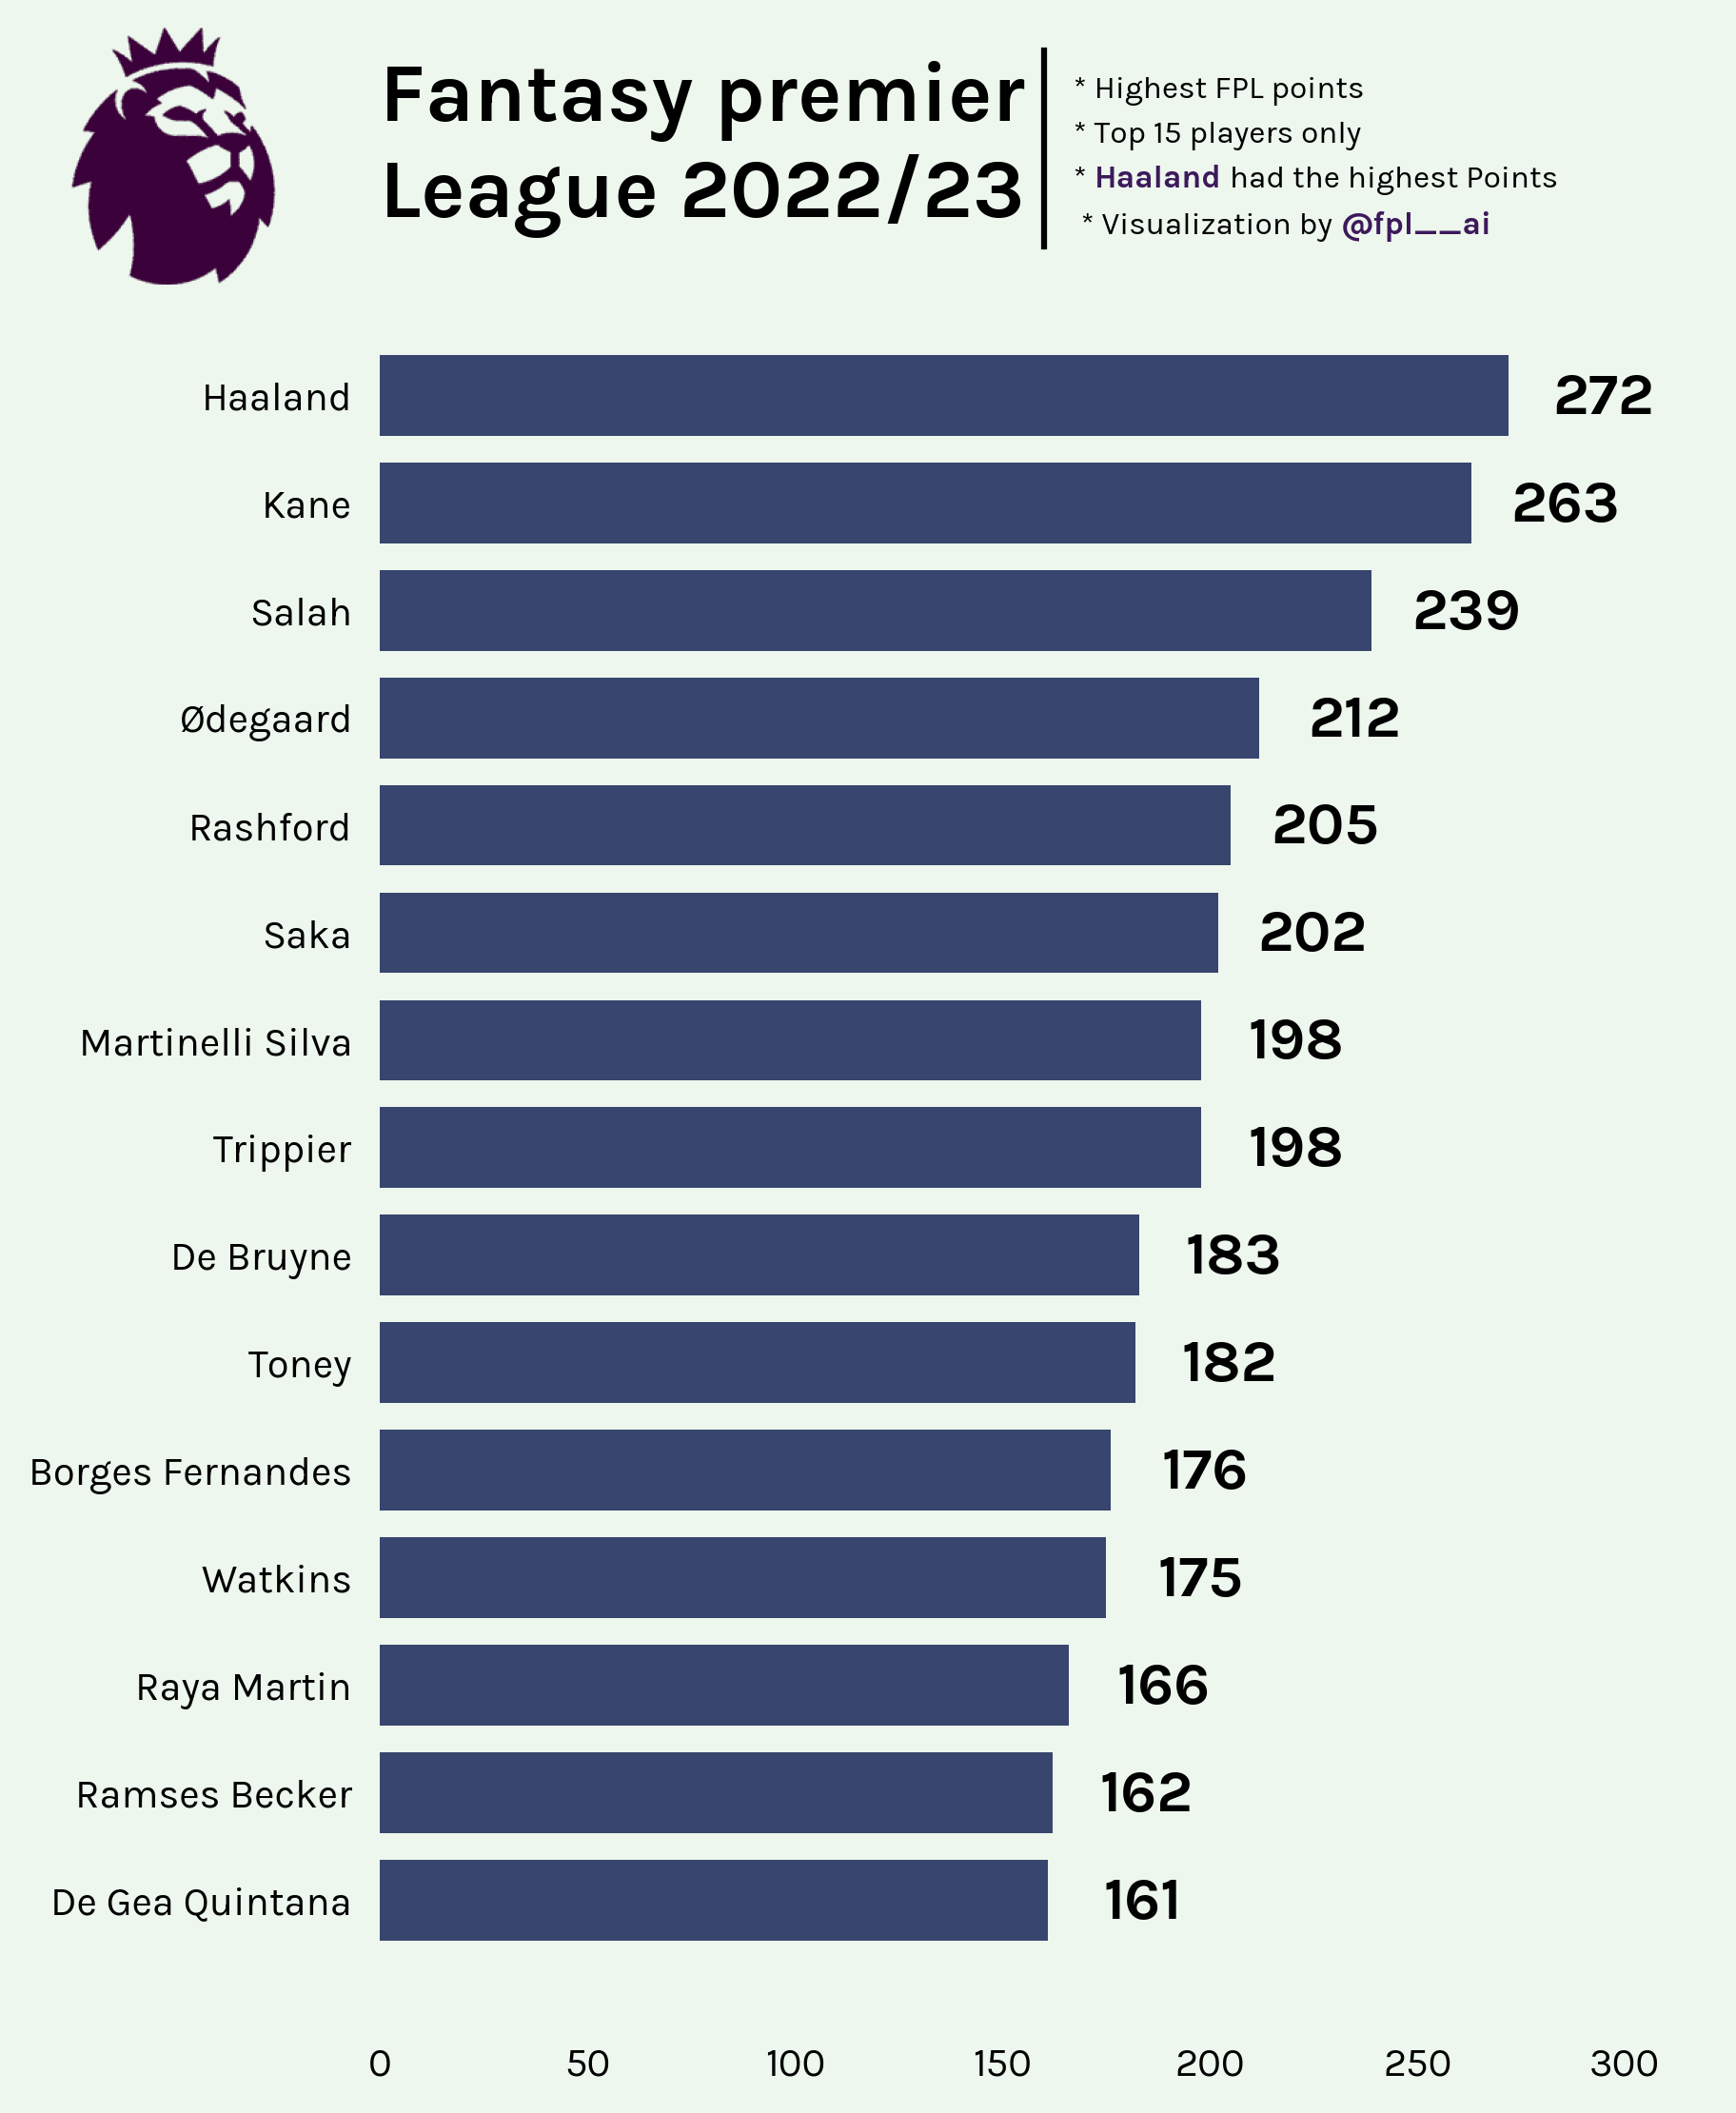

In [10]:
color="#edf7ed"
fig = plt.figure(facecolor =color,figsize=(6,9), dpi=300)#
ax_dict = fig.subplot_mosaic(
    layout
)


# Add grid and axis labels
#ax.grid(True, color = "lightgrey", ls = ":")

# We specify the height of the bar
height= 0.75

# Fouls conceded
ax_dict["bar"].barh(
    data["second_name"],
    data["total_points"],
    height=height,
    color="#38456e"
    )
ax_dict["bar"].spines["top"].set(visible = False)
ax_dict["bar"].spines["bottom"].set(visible = False)
ax_dict["bar"].spines["left"].set_visible(False)
ax_dict["bar"].spines["right"].set_visible(False)

ax_dict["bar"].xaxis.set_ticks_position('none')
ax_dict["bar"].yaxis.set_ticks_position('none')
# Remove spines
ax_dict["bar"].set_xlim(0,320)
ax_dict["bar"].set_facecolor(color)


#Annotate
for index, point in enumerate(data["total_points"]):
    ax_dict["bar"].annotate(
        xy = (point+18 , index-0.3),
        text = f"{point}",
        xytext = (5, 7),
        size = 15,
        textcoords = "offset points",
        color = "black",
        ha = "center",
        va = "center",
        weight = "bold"
    )

epl_logo_url = "https://images.fotmob.com/image_resources/logo/leaguelogo/47.png"
logo_ax = fig.add_axes([-0.07, 0.76, 0.15, 0.15])
club_icon = Image.open(urllib.request.urlopen(epl_logo_url))
logo_ax.imshow(club_icon)
logo_ax.axis("off")

#Title
ax_dict["heading"].set_facecolor("#fff3e0")
ax_dict["subheading"].set_facecolor("#fff3e0")
ax_dict["heading"].axis("off")
ax_dict["line"].axis("off")
ax_dict["subheading"].axis("off")
ax_dict["heading"].annotate(
    xy = (0, .5),
    text = "Fantasy premier \nLeague 2022/23",
    ha = "left",
    va = "center",
    weight = "bold",
    size = 21, color="#000000"
)


ax_dict["line"].plot([0.5,0.5],[0,1], lw=1.5, color='black', marker='')
#ax_dict["heading"].get_xlim()[1], ax_dict["heading"].get_xlim()[1]
ax_text(
    x =-0.05, y = 0.07,
    s = "* Highest FPL points\n* Top 15 players only\n* <Haaland> had the highest Points\n * Visualization by <@fpl__ai>",
    va = "bottom", ha = "left",
    highlight_textprops = [
        {"color": "#3d195b", "weight": "bold"},
        {"color":"#3d195b", "weight": "bold"},
    ],
    fontsize = 8, color = "black",ax=ax_dict["subheading"]
)

In [11]:
data_fwd=player_prev_stats[player_prev_stats["element_type"]=="FWD"][["second_name","element_type","total_points"]].sort_values(by="total_points").tail(15)

In [12]:
data_fwd

,second_name,element_type,total_points
458,Núñez Ribeiro,FWD,100
602,Awoniyi,FWD,100
215,Havertz,FWD,102
490,Álvarez,FWD,103
441,Firmino,FWD,104
332,Mitrović,FWD,107
599,Johnson,FWD,122
23,Fernando de Jesus,FWD,125
87,Solanke,FWD,130
137,Mbeumo,FWD,150


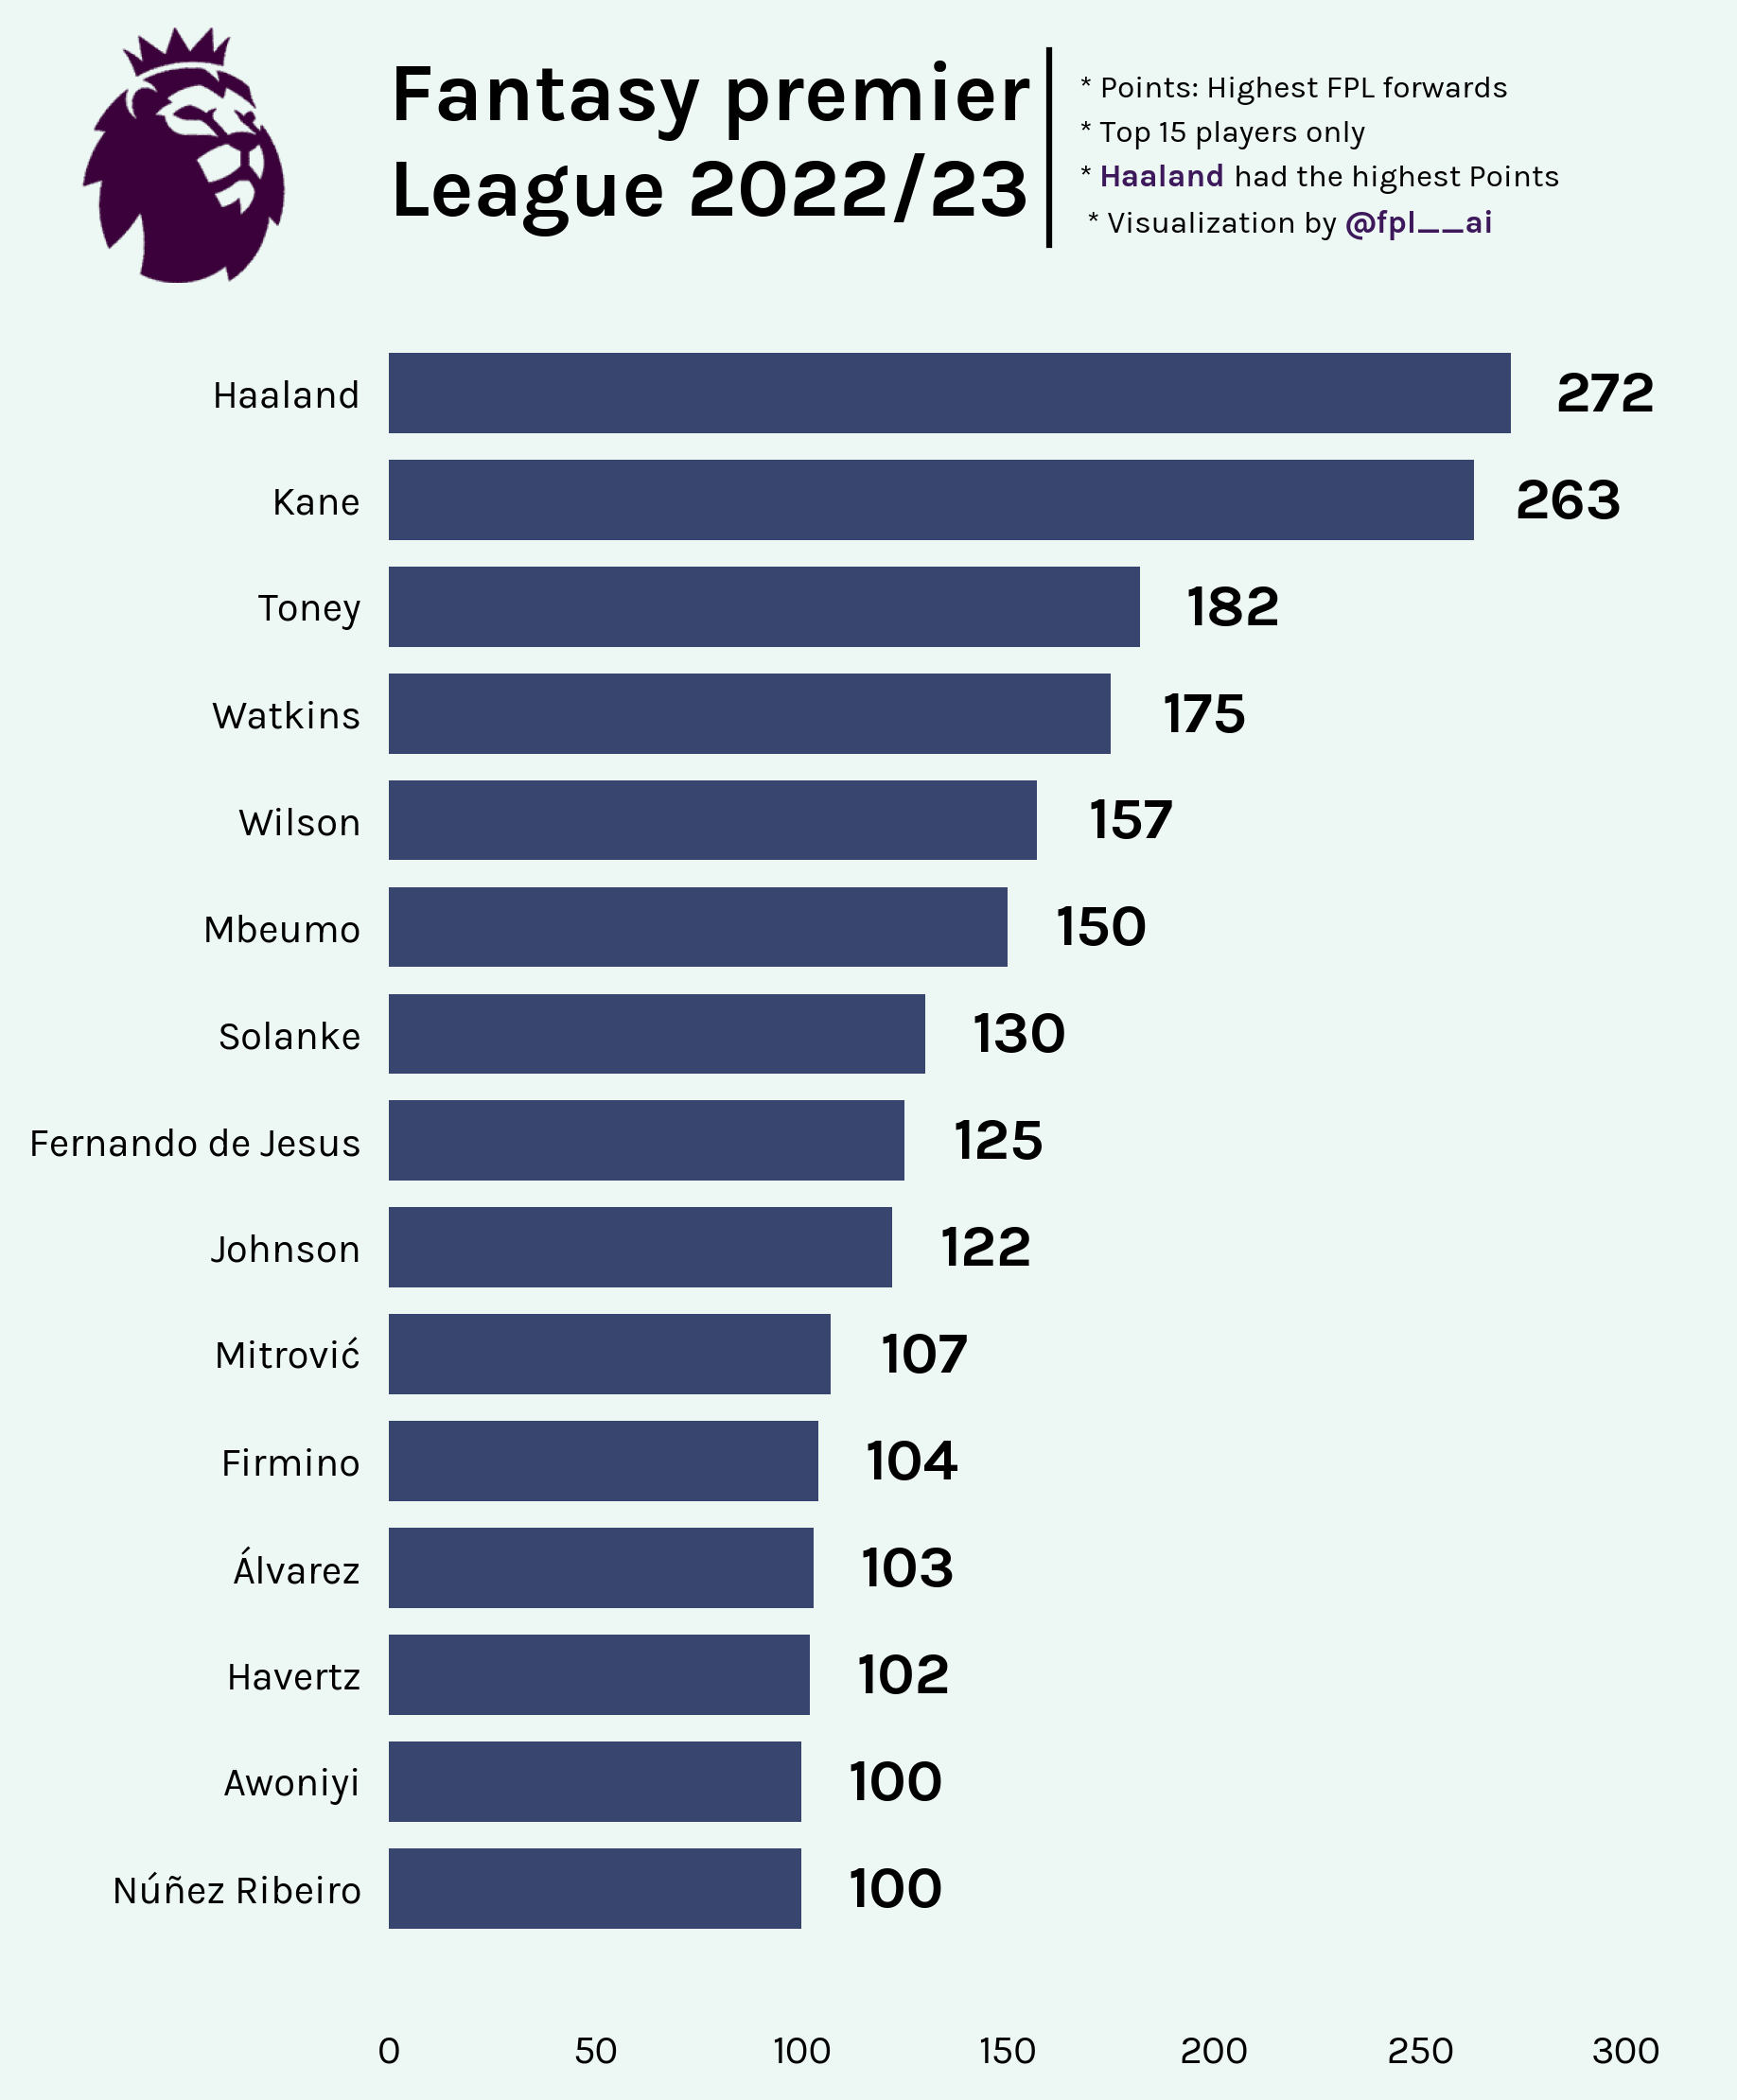

In [13]:
color="#edf7f4"
fig = plt.figure(facecolor =color,figsize=(6,9), dpi=300)#
ax_dict = fig.subplot_mosaic(
    layout
)


# Add grid and axis labels
#ax.grid(True, color = "lightgrey", ls = ":")

# We specify the height of the bar
height= 0.75

# Fouls conceded
ax_dict["bar"].barh(
    data_fwd["second_name"],
    data_fwd["total_points"],
    height=height,
    color="#38456e"
    )
ax_dict["bar"].spines["top"].set(visible = False)
ax_dict["bar"].spines["bottom"].set(visible = False)
ax_dict["bar"].spines["left"].set_visible(False)
ax_dict["bar"].spines["right"].set_visible(False)

ax_dict["bar"].xaxis.set_ticks_position('none')
ax_dict["bar"].yaxis.set_ticks_position('none')
# Remove spines
ax_dict["bar"].set_xlim(0,320)
ax_dict["bar"].set_facecolor(color)


#Annotate
for index, point in enumerate(data_fwd["total_points"]):
    ax_dict["bar"].annotate(
        xy = (point+18 , index-0.3),
        text = f"{point}",
        xytext = (5, 7),
        size = 15,
        textcoords = "offset points",
        color = "black",
        ha = "center",
        va = "center",
        weight = "bold"
    )

epl_logo_url = "https://images.fotmob.com/image_resources/logo/leaguelogo/47.png"
logo_ax = fig.add_axes([-0.07, 0.76, 0.15, 0.15])
club_icon = Image.open(urllib.request.urlopen(epl_logo_url))
logo_ax.imshow(club_icon)
logo_ax.axis("off")

#Title
ax_dict["heading"].set_facecolor("#fff3e0")
ax_dict["subheading"].set_facecolor("#fff3e0")
ax_dict["heading"].axis("off")
ax_dict["line"].axis("off")
ax_dict["subheading"].axis("off")
ax_dict["heading"].annotate(
    xy = (0, .5),
    text = "Fantasy premier \nLeague 2022/23",
    ha = "left",
    va = "center",
    weight = "bold",
    size = 21, color="#000000"
)


ax_dict["line"].plot([0.5,0.5],[0,1], lw=1.5, color='black', marker='')
#ax_dict["heading"].get_xlim()[1], ax_dict["heading"].get_xlim()[1]
ax_text(
    x =-0.05, y = 0.07,
    s = "* Points: Highest FPL forwards\n* Top 15 players only\n* <Haaland> had the highest Points\n * Visualization by <@fpl__ai>",
    va = "bottom", ha = "left",
    highlight_textprops = [
        {"color": "#3d195b", "weight": "bold"},
        {"color":"#3d195b", "weight": "bold"},
    ],
    fontsize = 8, color = "black",ax=ax_dict["subheading"]
)

In [14]:
data_mid=player_prev_stats[player_prev_stats["element_type"]=="MID"][["second_name","element_type","total_points"]].sort_values(by="total_points").tail(15)

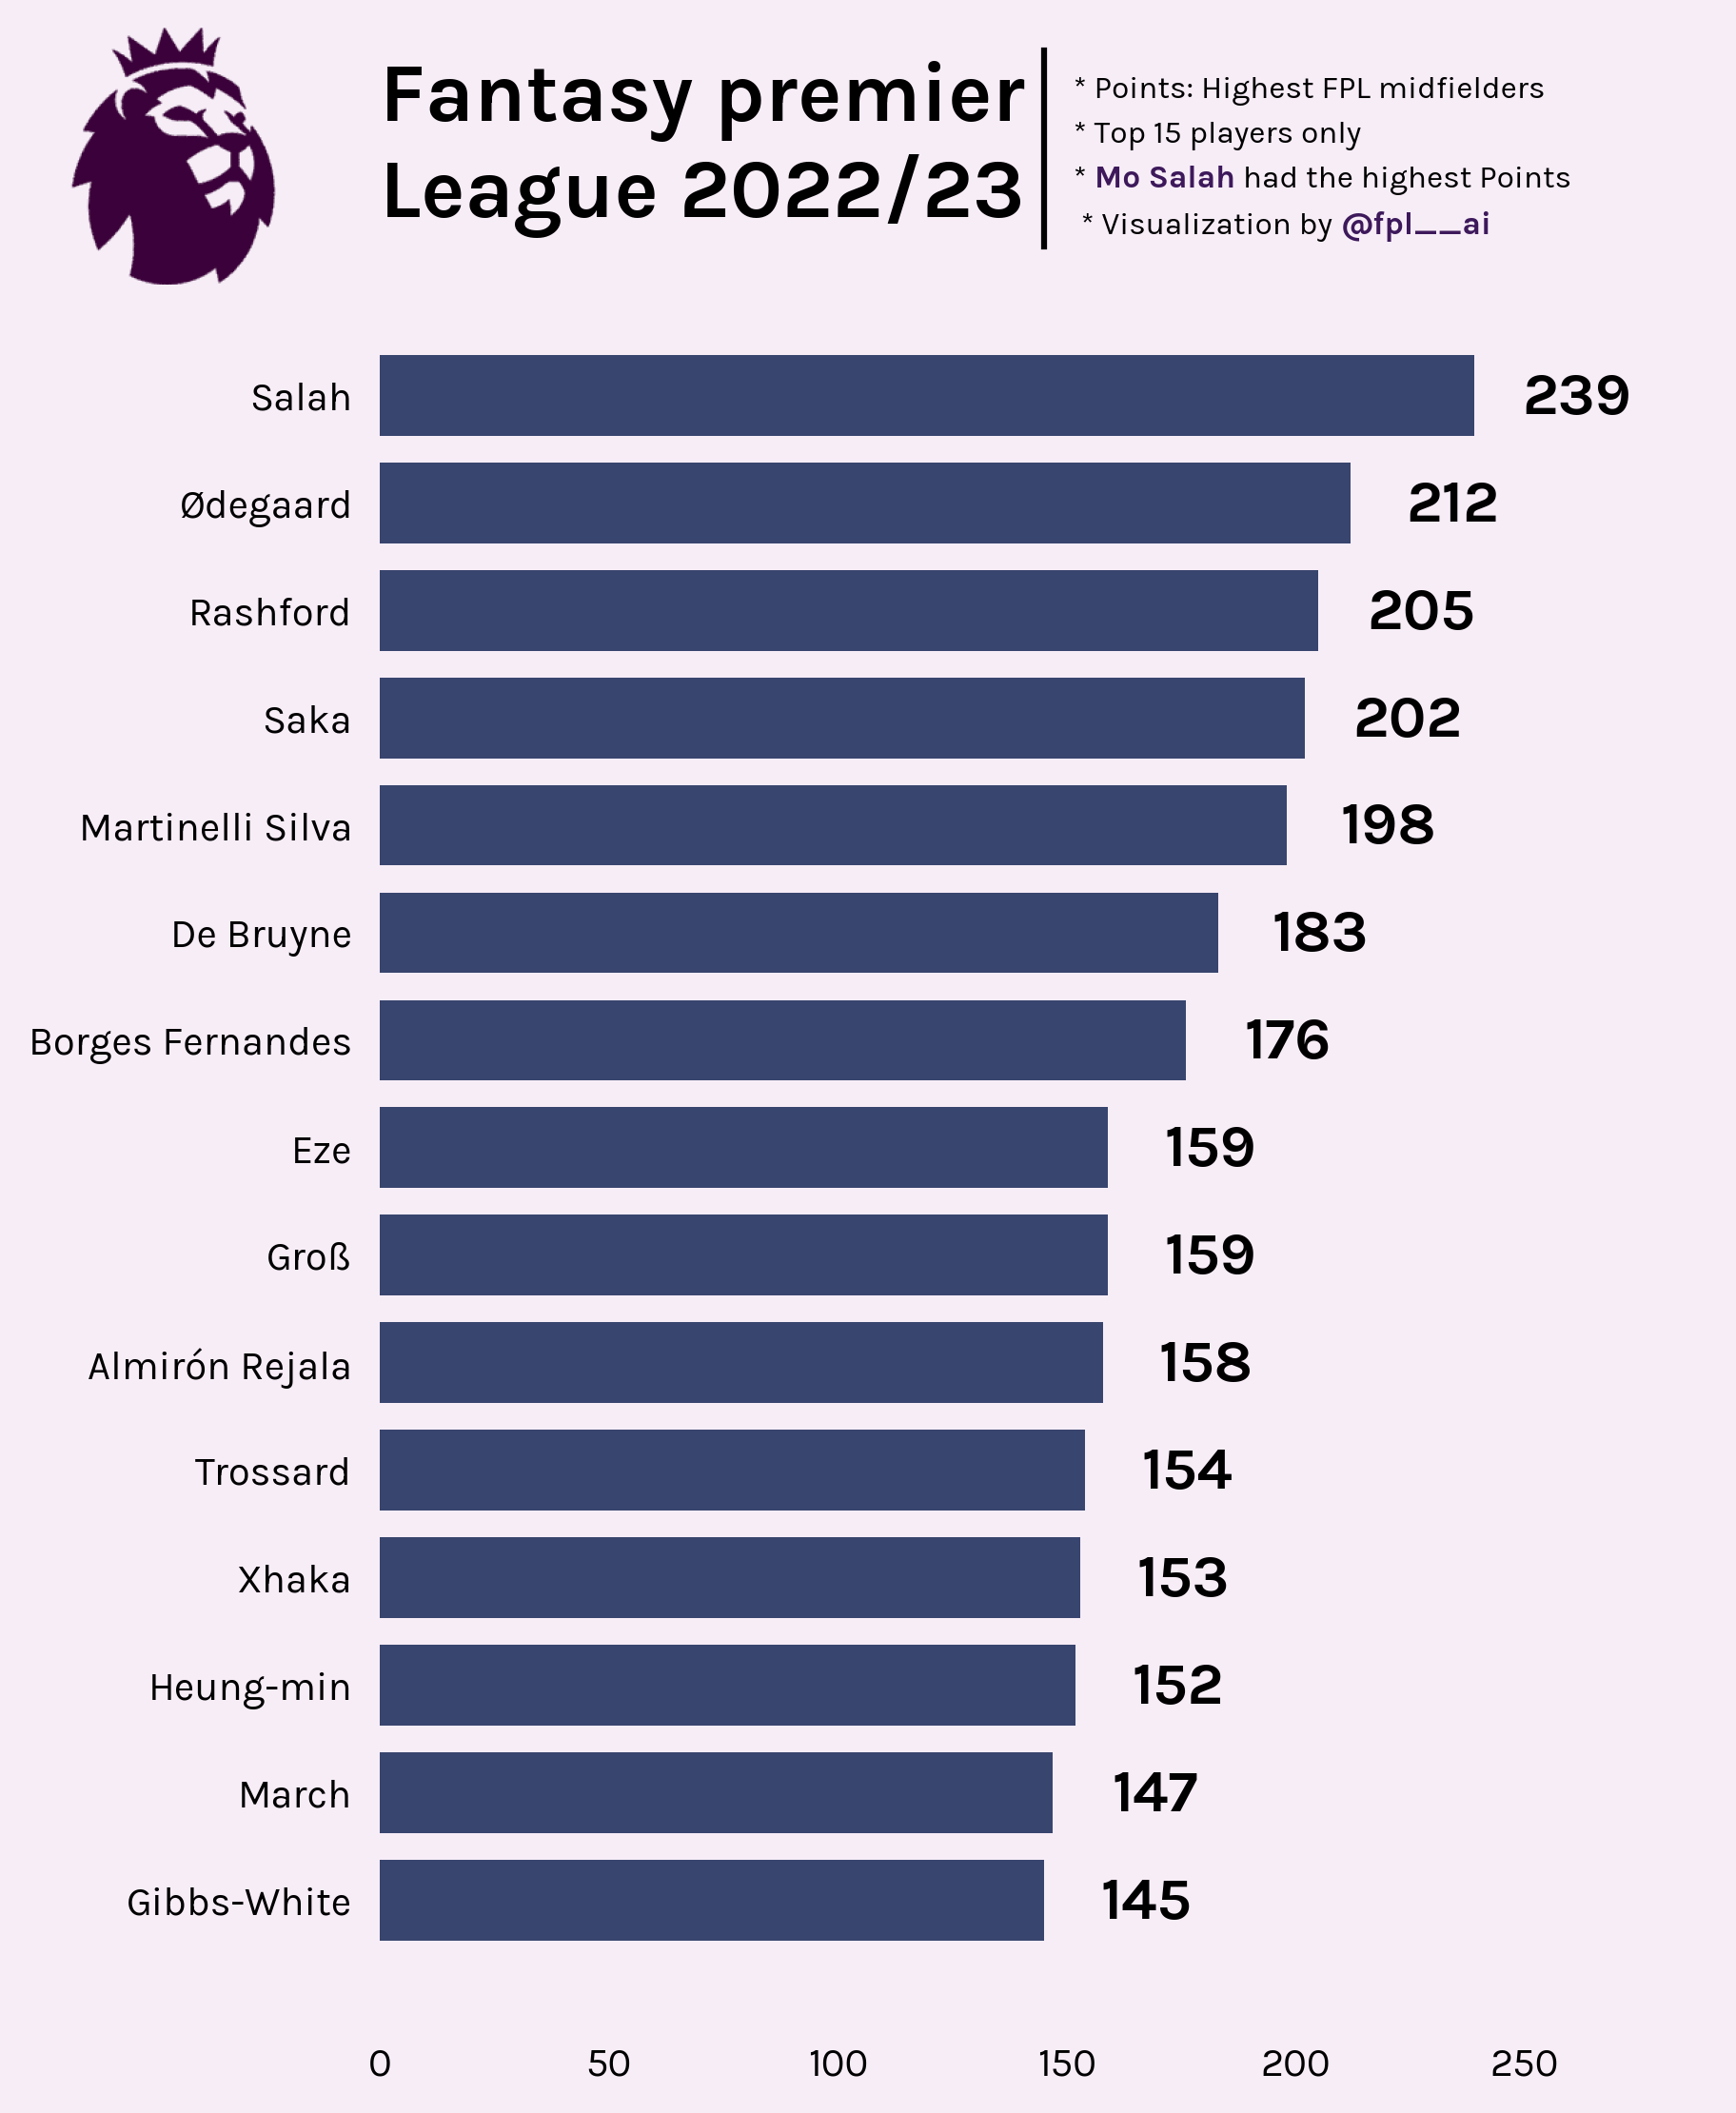

In [15]:
color="#f7edf7"
fig = plt.figure(facecolor =color,figsize=(6,9), dpi=300)#
ax_dict = fig.subplot_mosaic(
    layout
)


# Add grid and axis labels
#ax.grid(True, color = "lightgrey", ls = ":")

# We specify the height of the bar
height= 0.75

# Fouls conceded
ax_dict["bar"].barh(
    data_mid["second_name"],
    data_mid["total_points"],
    height=height,
    color="#38456e"
    )
ax_dict["bar"].spines["top"].set(visible = False)
ax_dict["bar"].spines["bottom"].set(visible = False)
ax_dict["bar"].spines["left"].set_visible(False)
ax_dict["bar"].spines["right"].set_visible(False)

ax_dict["bar"].xaxis.set_ticks_position('none')
ax_dict["bar"].yaxis.set_ticks_position('none')
# Remove spines
ax_dict["bar"].set_xlim(0,290)
ax_dict["bar"].set_facecolor(color)


#Annotate
for index, point in enumerate(data_mid["total_points"]):
    ax_dict["bar"].annotate(
        xy = (point+18 , index-0.3),
        text = f"{point}",
        xytext = (5, 7),
        size = 15,
        textcoords = "offset points",
        color = "black",
        ha = "center",
        va = "center",
        weight = "bold"
    )

epl_logo_url = "https://images.fotmob.com/image_resources/logo/leaguelogo/47.png"
logo_ax = fig.add_axes([-0.07, 0.76, 0.15, 0.15])
club_icon = Image.open(urllib.request.urlopen(epl_logo_url))
logo_ax.imshow(club_icon)
logo_ax.axis("off")

#Title
ax_dict["heading"].set_facecolor("#fff3e0")
ax_dict["subheading"].set_facecolor("#fff3e0")
ax_dict["heading"].axis("off")
ax_dict["heading"].axis("off")
ax_dict["line"].axis("off")
ax_dict["subheading"].axis("off")
ax_dict["heading"].annotate(
    xy = (0, .5),
    text = "Fantasy premier \nLeague 2022/23",
    ha = "left",
    va = "center",
    weight = "bold",
        size = 21, color="#000000"
)


ax_dict["line"].plot([0.5,0.5],[0,1], lw=1.5, color='black', marker='')
#ax_dict["heading"].get_xlim()[1], ax_dict["heading"].get_xlim()[1]
ax_text(
    x =-0.05, y = 0.07,
    s = "* Points: Highest FPL midfielders\n* Top 15 players only\n* <Mo Salah> had the highest Points\n * Visualization by <@fpl__ai>",
    va = "bottom", ha = "left",
    highlight_textprops = [
        {"color": "#3d195b", "weight": "bold"},
        {"color":"#3d195b", "weight": "bold"},
    ],
    fontsize = 8, color = "black",ax=ax_dict["subheading"]
)

In [16]:
data_def=player_prev_stats[player_prev_stats["element_type"]=="DEF"][["second_name","element_type","total_points"]].sort_values(by="total_points").tail(15)

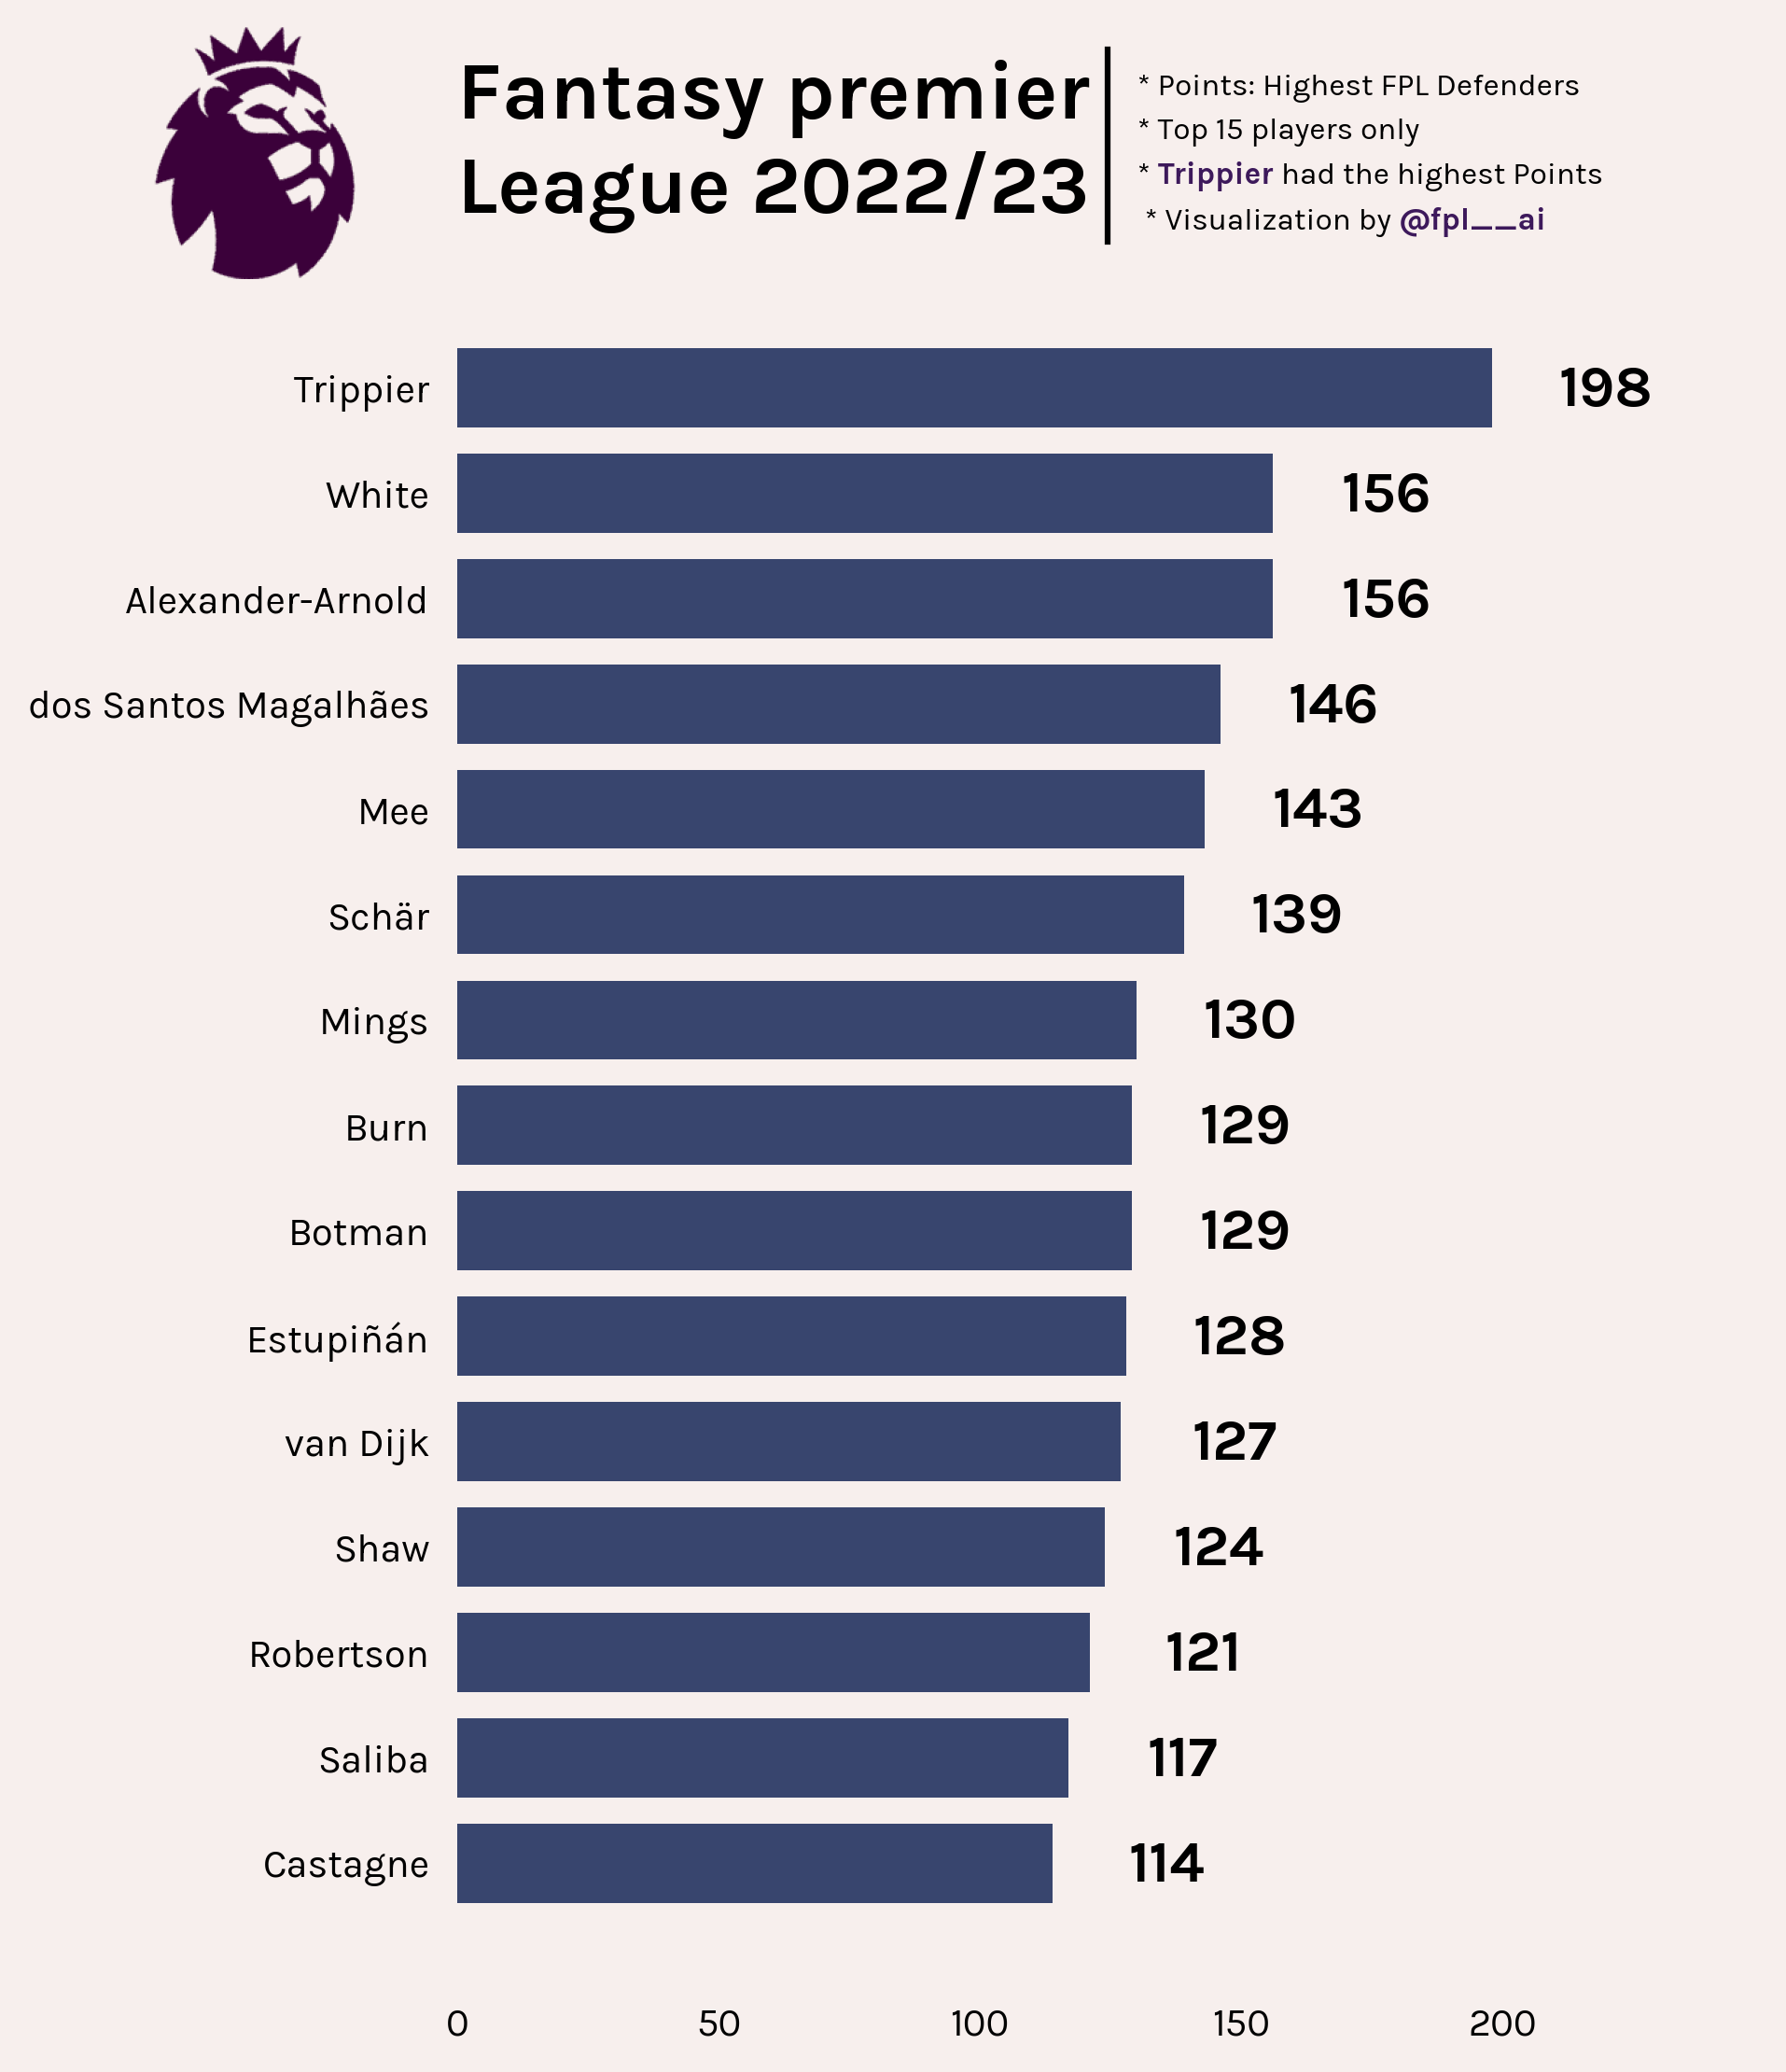

In [17]:
color="#f7efed"
fig = plt.figure(facecolor =color,figsize=(6,9), dpi=300)#
ax_dict = fig.subplot_mosaic(
    layout
)


# Add grid and axis labels
#ax.grid(True, color = "lightgrey", ls = ":")

# We specify the height of the bar
height= 0.75

# Fouls conceded
ax_dict["bar"].barh(
    data_def["second_name"],
    data_def["total_points"],
    height=height,
    color="#38456e"
    )
ax_dict["bar"].spines["top"].set(visible = False)
ax_dict["bar"].spines["bottom"].set(visible = False)
ax_dict["bar"].spines["left"].set_visible(False)
ax_dict["bar"].spines["right"].set_visible(False)

ax_dict["bar"].xaxis.set_ticks_position('none')
ax_dict["bar"].yaxis.set_ticks_position('none')
# Remove spines
ax_dict["bar"].set_xlim(0,249)
ax_dict["bar"].set_facecolor(color)


#Annotate
for index, point in enumerate(data_def["total_points"]):
    ax_dict["bar"].annotate(
        xy = (point+18 , index-0.3),
        text = f"{point}",
        xytext = (5, 7),
        size = 15,
        textcoords = "offset points",
        color = "black",
        ha = "center",
        va = "center",
        weight = "bold"
    )

epl_logo_url = "https://images.fotmob.com/image_resources/logo/leaguelogo/47.png"
logo_ax = fig.add_axes([-0.07, 0.76, 0.15, 0.15])
club_icon = Image.open(urllib.request.urlopen(epl_logo_url))
logo_ax.imshow(club_icon)
logo_ax.axis("off")

#Title
ax_dict["heading"].set_facecolor("#fff3e0")
ax_dict["subheading"].set_facecolor("#fff3e0")
ax_dict["heading"].axis("off")
ax_dict["line"].axis("off")
ax_dict["subheading"].axis("off")
ax_dict["heading"].annotate(
    xy = (0, .5),
    text = "Fantasy premier \nLeague 2022/23",
    ha = "left",
    va = "center",
    weight = "bold",
        size = 21, color="#000000"
)


ax_dict["line"].plot([0.5,0.5],[0,1], lw=1.5, color='black', marker='')
#ax_dict["heading"].get_xlim()[1], ax_dict["heading"].get_xlim()[1]
ax_text(
    x =-0.05, y = 0.07,
    s = "* Points: Highest FPL Defenders\n* Top 15 players only\n* <Trippier> had the highest Points\n * Visualization by <@fpl__ai>",
    va = "bottom", ha = "left",
    highlight_textprops = [
        {"color": "#3d195b", "weight": "bold"},
        {"color":"#3d195b", "weight": "bold"},
    ],
    fontsize = 8, color = "black",ax=ax_dict["subheading"]
)

In [18]:
data_gk=player_prev_stats[player_prev_stats["element_type"]=="GK"][["second_name","element_type","total_points"]].sort_values(by="total_points").tail(8)

In [19]:
data_gk

,second_name,element_type,total_points
37,Martínez Romero,GK,135
320,Leno,GK,142
12,Ramsdale,GK,143
743,Malheiro de Sá,GK,148
571,Pope,GK,157
508,De Gea Quintana,GK,161
443,Ramses Becker,GK,162
123,Raya Martin,GK,166


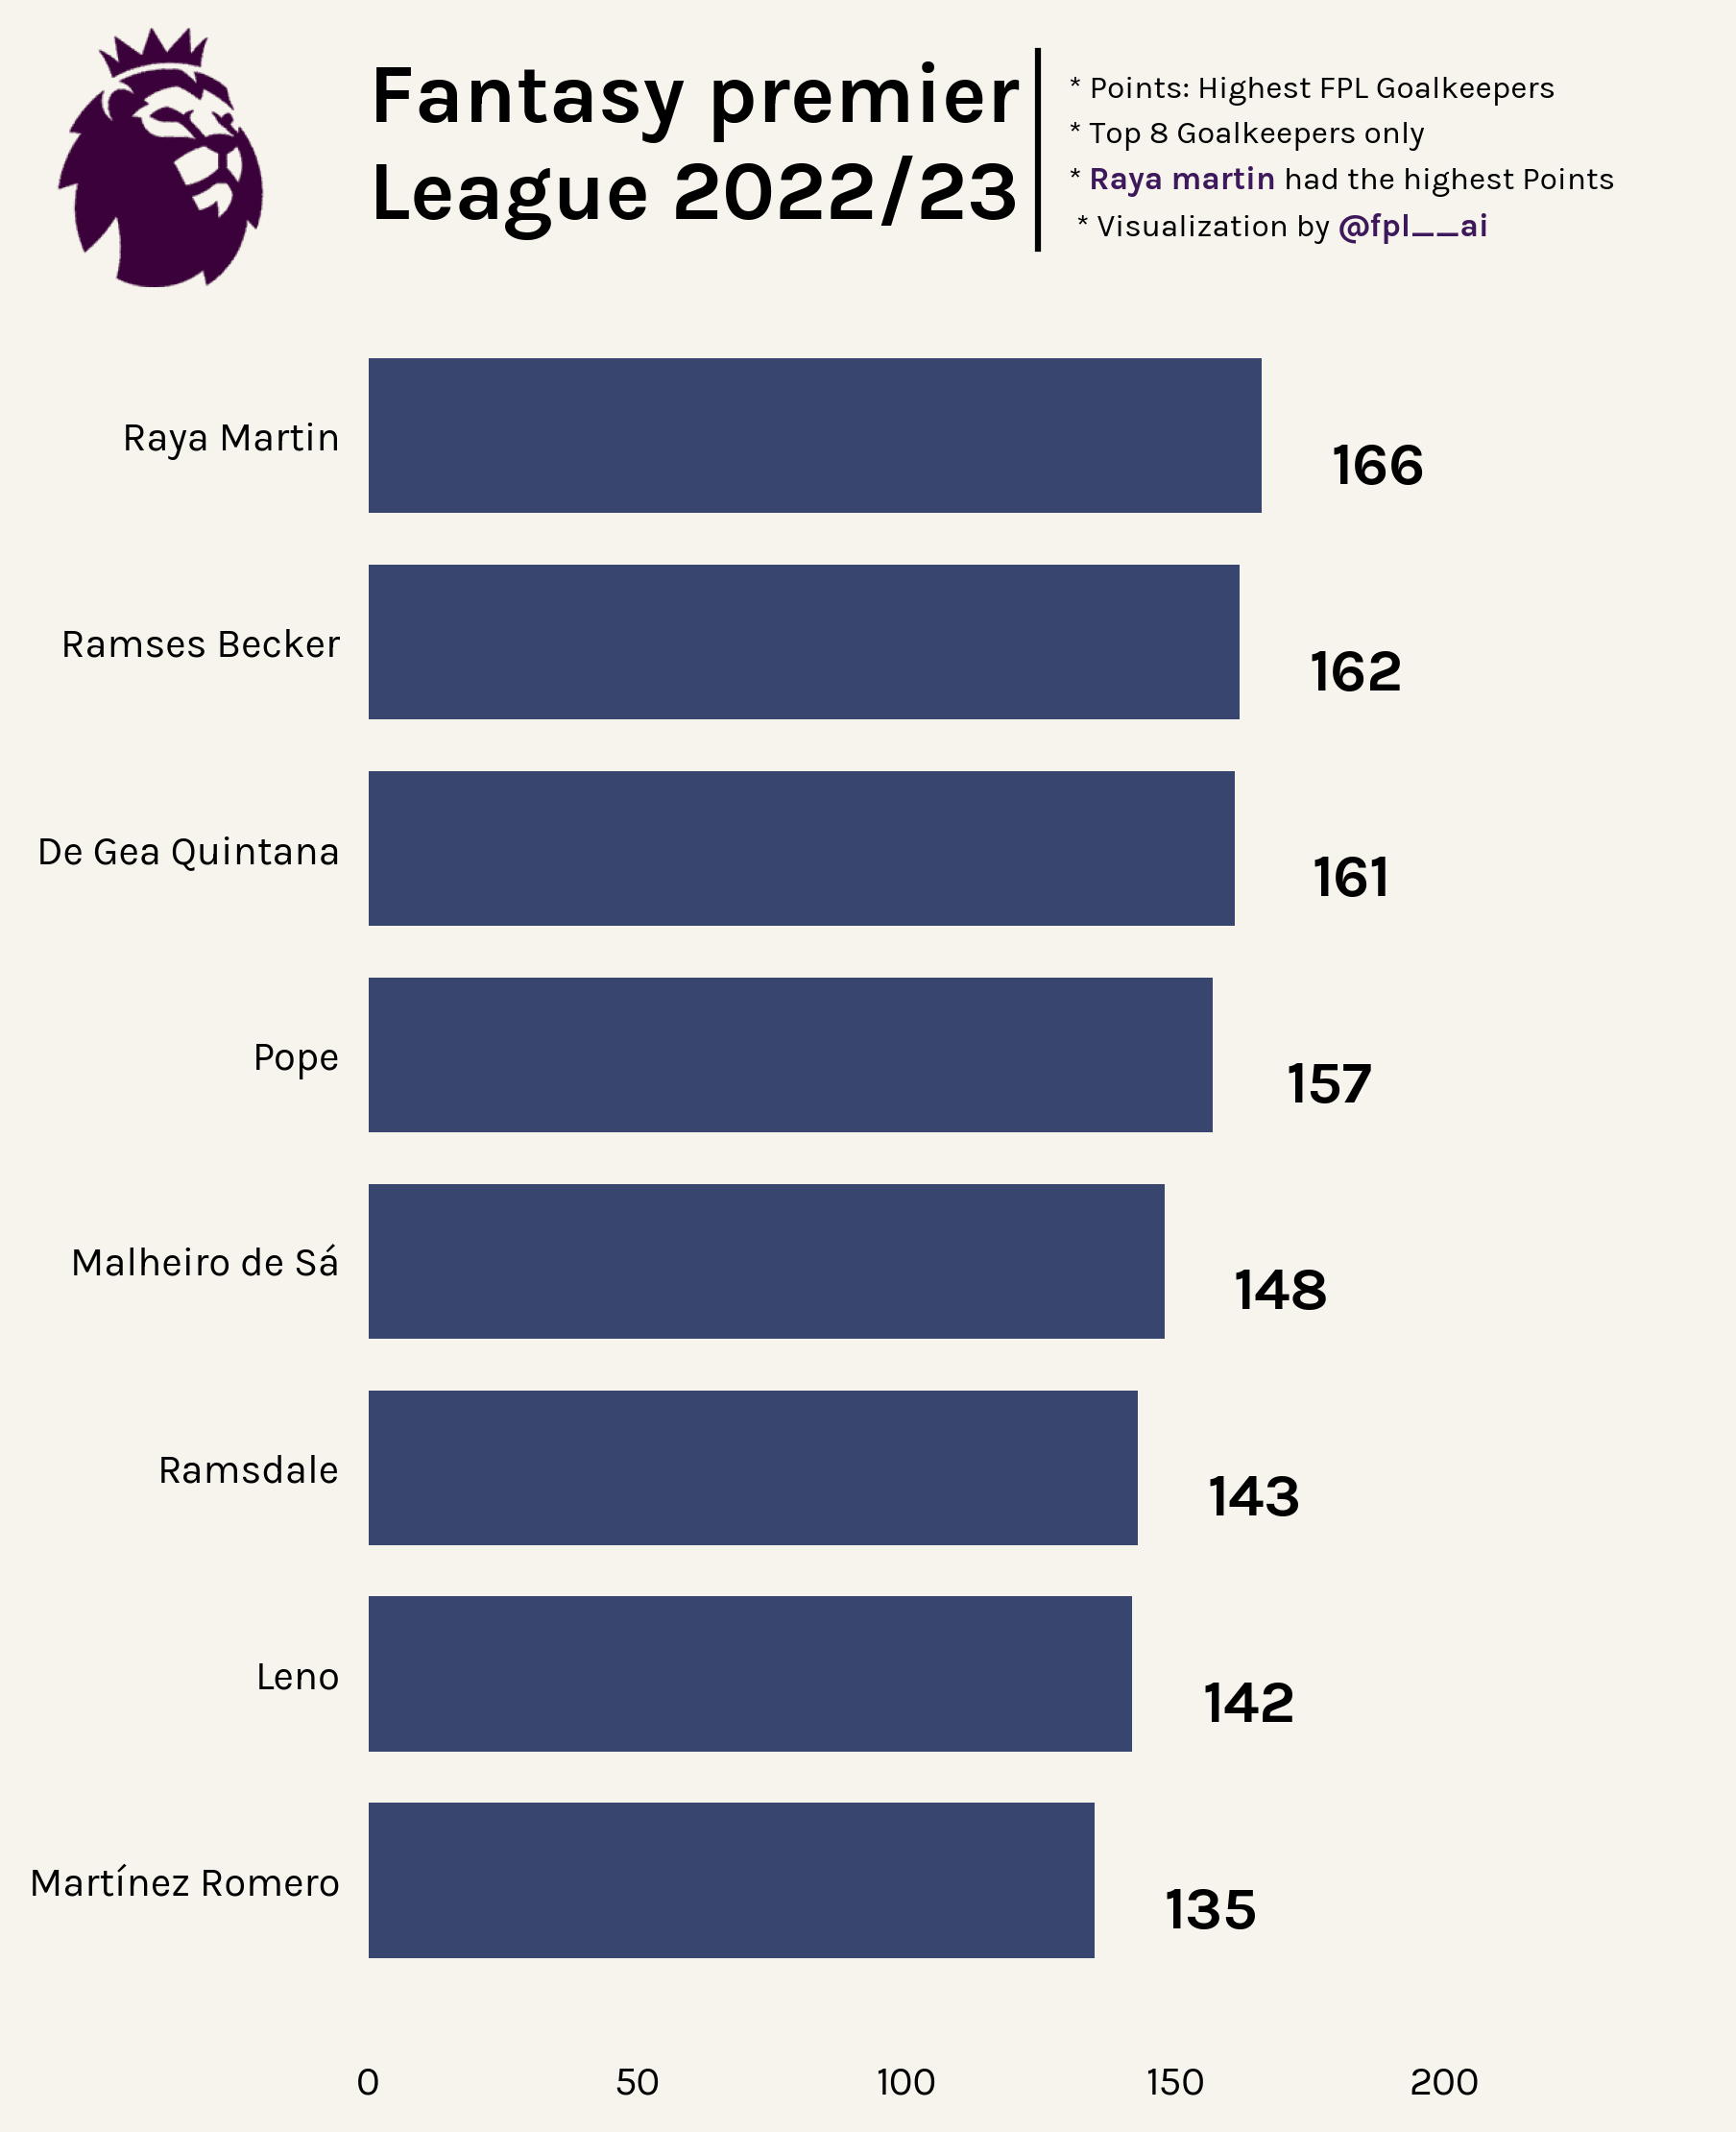

In [20]:
color="#f7f3ed"
fig = plt.figure(facecolor =color,figsize=(6,9), dpi=300)#
ax_dict = fig.subplot_mosaic(
    layout
)


# Add grid and axis labels
#ax.grid(True, color = "lightgrey", ls = ":")

# We specify the height of the bar
height= 0.75

# Fouls conceded
ax_dict["bar"].barh(
    data_gk["second_name"],
    data_gk["total_points"],
    height=height,
    color="#38456e"
    )
ax_dict["bar"].spines["top"].set(visible = False)
ax_dict["bar"].spines["bottom"].set(visible = False)
ax_dict["bar"].spines["left"].set_visible(False)
ax_dict["bar"].spines["right"].set_visible(False)

ax_dict["bar"].xaxis.set_ticks_position('none')
ax_dict["bar"].yaxis.set_ticks_position('none')
# Remove spines
ax_dict["bar"].set_xlim(0,249)
ax_dict["bar"].set_facecolor(color)


#Annotate
for index, point in enumerate(data_gk["total_points"]):
    ax_dict["bar"].annotate(
        xy = (point+18 , index-0.3),
        text = f"{point}",
        xytext = (5, 7),
        size = 15,
        textcoords = "offset points",
        color = "black",
        ha = "center",
        va = "center",
        weight = "bold"
    )

epl_logo_url = "https://images.fotmob.com/image_resources/logo/leaguelogo/47.png"
logo_ax = fig.add_axes([-0.07, 0.76, 0.15, 0.15])
club_icon = Image.open(urllib.request.urlopen(epl_logo_url))
logo_ax.imshow(club_icon)
logo_ax.axis("off")

#Title
ax_dict["heading"].set_facecolor("#fff3e0")
ax_dict["subheading"].set_facecolor("#fff3e0")
ax_dict["heading"].axis("off")
ax_dict["line"].axis("off")
ax_dict["subheading"].axis("off")
ax_dict["heading"].annotate(
    xy = (0, .5),
    text = "Fantasy premier \nLeague 2022/23",
    ha = "left",
    va = "center",
    weight = "bold",
        size = 21, color="#000000"
)


ax_dict["line"].plot([0.5,0.5],[0,1], lw=1.5, color='black', marker='')
#ax_dict["heading"].get_xlim()[1], ax_dict["heading"].get_xlim()[1]
ax_text(
    x =-0.05, y = 0.07,
    s = "* Points: Highest FPL Goalkeepers\n* Top 8 Goalkeepers only\n* <Raya martin> had the highest Points\n * Visualization by <@fpl__ai>",
    va = "bottom", ha = "left",
    highlight_textprops = [
        {"color": "#3d195b", "weight": "bold"},
        {"color":"#3d195b", "weight": "bold"},
    ],
    fontsize = 8, color = "black",ax=ax_dict["subheading"]
)

In [ ]:
layout = [["heading"]*7+["line"]+["subheading"]*7,
  ["heading"]*7+["line"]+["subheading"]*7,["bar"]*15,["bar"]*15,["bar"]*15,["bar"]*15,["bar"]*15,["bar"]*15,["bar"]*15,["bar"]*15,["bar"]*15,["bar"]*15,["bar"]*15,["bar"]*15,["bar"]*15,["bar"]*15,["bar"]*15]

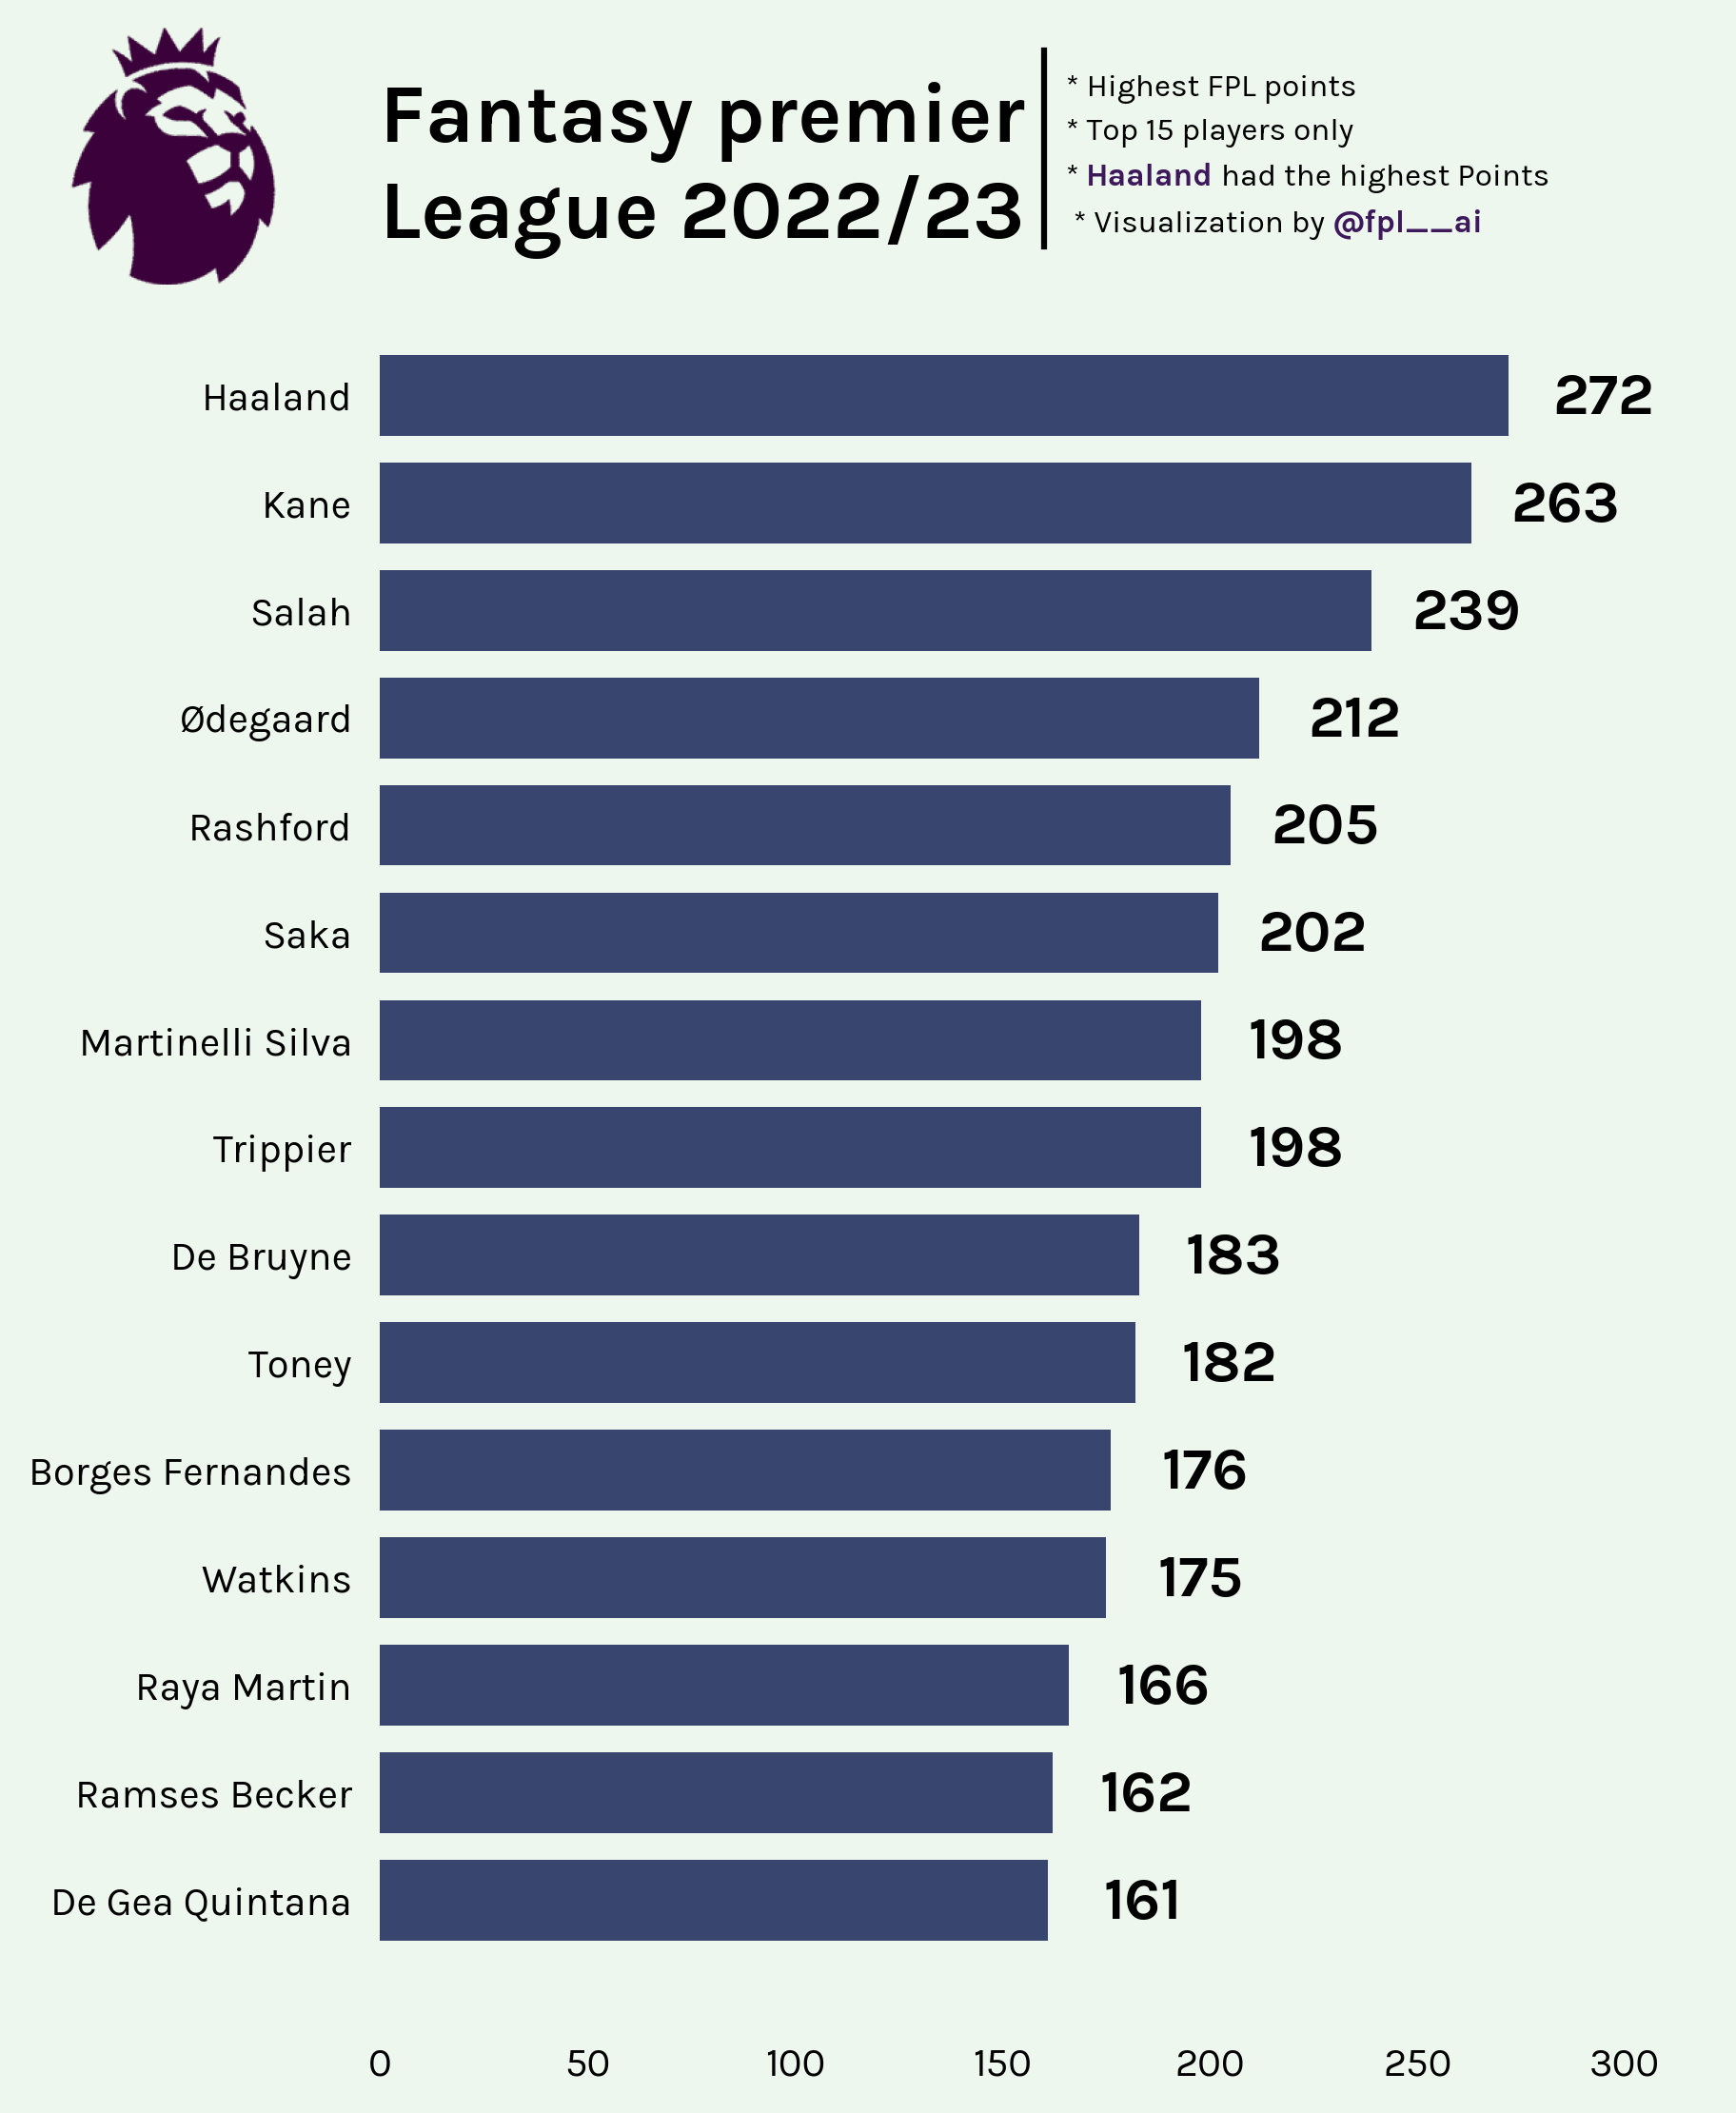

In [ ]:
color="#edf7ed"
fig = plt.figure(facecolor =color,figsize=(6,9), dpi=300)#
ax_dict = fig.subplot_mosaic(
    layout
)


# Add grid and axis labels
#ax.grid(True, color = "lightgrey", ls = ":")

# We specify the height of the bar
height= 0.75

# Fouls conceded
ax_dict["bar"].barh(
    data["second_name"],
    data["total_points"],
    height=height,
    color="#38456e"
    )
ax_dict["bar"].spines["top"].set(visible = False)
ax_dict["bar"].spines["bottom"].set(visible = False)
ax_dict["bar"].spines["left"].set_visible(False)
ax_dict["bar"].spines["right"].set_visible(False)

ax_dict["bar"].xaxis.set_ticks_position('none')
ax_dict["bar"].yaxis.set_ticks_position('none')
# Remove spines
ax_dict["bar"].set_xlim(0,320)
ax_dict["bar"].set_facecolor(color)


#Annotate
for index, point in enumerate(data["total_points"]):
    ax_dict["bar"].annotate(
        xy = (point+18 , index-0.3),
        text = f"{point}",
        xytext = (5, 7),
        size = 15,
        textcoords = "offset points",
        color = "black",
        ha = "center",
        va = "center",
        weight = "bold"
    )

epl_logo_url = "https://images.fotmob.com/image_resources/logo/leaguelogo/47.png"
logo_ax = fig.add_axes([-0.07, 0.76, 0.15, 0.15])
club_icon = Image.open(urllib.request.urlopen(epl_logo_url))
logo_ax.imshow(club_icon)
logo_ax.axis("off")

#Title
ax_dict["heading"].set_facecolor("#fff3e0")
ax_dict["subheading"].set_facecolor("#fff3e0")
ax_dict["heading"].axis("off")
ax_dict["line"].axis("off")
ax_dict["subheading"].axis("off")
ax_dict["heading"].annotate(
    xy = (0, .4),
    text = "Fantasy premier \nLeague 2022/23",
    ha = "left",
    va = "center",
    weight = "bold",
    size = 21, color="#000000"
)


ax_dict["line"].plot([0,0],[0,1], lw=1.5, color='black', marker='')
#ax_dict["heading"].get_xlim()[1], ax_dict["heading"].get_xlim()[1]
ax_text(
    x =-0.05, y = 0.08,
    s = "* Highest FPL points\n* Top 15 players only\n* <Haaland> had the highest Points\n * Visualization by <@fpl__ai>",
    va = "bottom", ha = "left",
    highlight_textprops = [
        {"color": "#3d195b", "weight": "bold"},
        {"color":"#3d195b", "weight": "bold"},
    ],
    fontsize = 8, color = "black",ax=ax_dict["subheading"]
)